<a href="https://colab.research.google.com/github/Surojit-KB/UNIV-AI-ML1C1-HW3/blob/main/Copy_of_distribute_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1nMaBQ7g88duMECw_B4mH8ruxwnIwVzGP" width=300/> 

# ML-1: Standardization, Classification & Model evaluation
## Homework 3: Are you mad enough to sell more clothes?

**ML-1 Cohort 1** <br>
**Instructor: Dr. Rahul Dave**<br>
**Max Score: 100** <br>

### Name of people who have worked on this homework:

## Table of Contents 
* [HW-3: Are you mad enough to sell more clothes?](#HW-3:-Are-you-mad-enough-to-sell-more-clothes?)
  * [Instructions](##Instructions)
  * [Overview](##Overview)
  * [Q1: Test & Training Sets & Standardization](##Q1:-Test-&-Training-Sets-&-Standardization)
    * [1.1 Train-Test Split](###1.1-Train-Test-Split)
    * [1.2 Standardizing data](##1.2-Standardizing-data)
  * [Q2: Classification with Lasso (L1) regularization](##Q2:-Classification-with-Lasso-(L1)-regularization)
    * [2.1 Baseline Classifiers](###2.1-Baseline-Classifiers)
    * [2.2 Classification Model - Logistic with Lasso (L1)](###2.2-Classification-Model-Logistic-with-Lasso-(L1))
    * [2.3 Prediction](###2.3-Prediction)
  * [Q3: Confusion Matrix, Costs, Averge Profit & Thresholds](##Q3:-Confusion-Matrix,-Costs,-Averge-Profit-&-Thresholds)
    * [3.1 Confusion Matrix](####3.1-Confusion-Matrix)
    * [3.2 Cost and Utility Matrix](####3.2-Cost-and-Utility-Matrix)
    * [3.3 Average Profit Per Person](####3.3-Average-Profit-Per-Person)
    * [3.4 Thresholds](####3.4-Thresholds)
  * [Q4: ROC Curves & Profit Curves](##Q4:-ROC-Curves-&-Profit-Curves)
    * [4.1 ROC Curves](####4.1-ROC-Curves)
    * [4.2 Profit Curves](####4.2-Profit-Curves)

## Instructions

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To work on the homework, you will first need to fork the repository into your GitHub account and clone it to work on it on your local computer. To submit your homework, push your homework into the same GitHub and upload the link on edStem.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropriate plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">

## Overview

The data set is from a fairly high end clothing chain store in the North East. You should be familiar with this data from Exercise 3 where you learnt about feature engineering.

You are a data analyst for this store. Your job is to write a report to the pointy-haired boss in which you show how you can increase the store's profit by targeting whom to send a catalog in the mail. Yes, you are in direct marketing. You are a quant amongst the "mad men". 

You need to explore and layout in simple terms, what the business needs to spend to increase its profit. In other words, you need a budget, and its your job to figure out how much as well.

We'll guide you through the process. There is much more you can explore, of-course, but this homework will walk you through an entire real world classification and analysis process with a finite amount of work and computer runtime.

You will

1. learn how to standardize the data
2. write a classifier on this data, including cross validation
3. learn how to compare this classifier to baseline classifiers that you better beat using a profit metric rather than an accuracy metric
4. understand and use prediction thresholds
5. understand the use a ROC curve
6. learn to use a profit curve to pick a model, thus directly reflecting the metric of importance

You have been provided with the cleaned data after numerous feature transformations.

The idea for this homework, and the attendant data set is taken from the book "Data Mining Methods and Models" by [Larose](http://www.dataminingconsultant.com/DMMM.htm).

---

In [ ]:
# Run this cell to import the required libraries

%matplotlib inline
import numpy as np
import scipy as sp
from scipy.stats.stats import pearsonr
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import warnings
#warnings.filterwarnings("ignore")
import seaborn as sns
# sns.set_style("whitegrid")
# sns.set_context("poster")

sns.set_style()
sns.set_context("talk")

## Q1: Test & Training Sets & Standardization (15 points)

We standardize test and training sets separately. Specifically, we wish to standardize the non-indicator columns on both the test and training sets, by subtracting out the mean of the training set from the value, and dividing by the standard deviation of the training set. This helps us put all the continuous variables on the same scale.

#### 1.1 Train-Test Split (5 points)

**Split the data(`dftouse` dataframe) into train and test in 70:30 ratio. Print out the shape of your train and test features and labels. ('X_train','X_test','y_train','y_test')**

In [ ]:
#Dont Run
#This was just done to get the raw data directly from Github, pickle it and store it in drive for further use
#Pickle file is provided in the repo
df = pd.read_csv("https://raw.githubusercontent.com/Surojit-KB/Homework3/master/data/Cleaned_clothing_store_data.csv?token=AQT2I772DITASWDKTXBSCALAFUQHS")
df.head()

,FRE,MON,i_CC_CARD,AVRG,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,i_WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,PERCRET,RESP,i_VALPHON,i_PREVPD,i_AMSPEND,i_PSSPEND,i_CCSPEND,i_AXSPEND,i_RESPONDED,i_PERCRET,i_PSWEATERS,i_PKNIT_TOPS,i_PKNIT_DRES,i_PBLOUSES,i_PJACKETS,i_PCAR_PNTS,i_PCAS_PNTS,i_PSHIRTS,i_PDRESSES,i_PSUITS,i_POUTERWEAR,i_PJEWELRY,i_PFASHION,i_PLEGWEAR,i_PCOLLSPND,i_RECENT,i_SAVER
0,2,368.46,0,184.23,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.000000,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.00,0.00,0.00,0.00,0.60,17,666,333.00,0.08,9,1,11,1,0,5,0,0.00,31.81,111.00,0.00,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1
1,4,258.00,1,64.50,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.000000,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.00,55.99,258.00,0.00,0.54,14,696,174.00,0.33,6,0,14,1,0,4,2,50.00,32.72,43.50,0.03,1,1,0,0,0,1,0,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1
2,2,77.00,0,38.50,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,77.00,0.0,0.00,0.00,0.00,39.00,0.62,10,343,171.50,0.11,1,0,2,1,0,4,0,0.00,100.00,68.60,0.00,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,8,846.06,1,105.75,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0.0,0.0,0.005307,0.03,0.01,0.00,0.0,0.0,846.06,0.0,104.94,0.00,373.87,166.25,0.43,24,701,87.62,0.29,15,3,35,1,0,9,6,66.67,23.27,26.96,0.00,0,1,1,0,0,1,0,1,0,1,0,1,1,1,1,0,1,0,0,0,1,1,1,0,1,1
4,1,87.44,0,87.44,0.20,0.20,0.00,0.00,0.0,0.00,0.41,0.00,0.00,0.0,0.0,0.170000,0.00,0.00,0.00,0.0,0.0,87.44,0.0,87.44,0.00,87.44,0.00,0.22,0,49,49.00,0.42,4,0,8,1,0,0,0,0.00,28.52,24.50,0.00,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
df.to_pickle('/content/drive/MyDrive/Colab Notebooks/UNIV-AI-ML1/HW1/Cleaned_clothing_store.csv')
del df

In [ ]:
# loading data from pickle
#Change the location appropriately
df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/UNIV-AI-ML1/HW1/Cleaned_clothing_store.csv')
dftouse = df.copy()

In [ ]:
# your code here
#Splitting the data into 70-30 train test split
X=dftouse.drop('RESP',axis=1)
y=dftouse['RESP']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3) 
print('Train shape:',X_train.shape)
print('Test shape:',X_test.shape)

Train shape: (15217, 68)
Test shape: (6522, 68)


In [ ]:
print(X_train.columns)

Index(['FRE', 'MON', 'i_CC_CARD', 'AVRG', 'PSWEATERS', 'PKNIT_TOPS',
       'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS',
       'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY', 'PFASHION',
       'PLEGWEAR', 'PCOLLSPND', 'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND',
       'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'GMP', 'PROMOS',
       'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES', 'STORES',
       'i_WEB', 'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI', 'LTFREDAY',
       'PERCRET', 'i_VALPHON', 'i_PREVPD', 'i_AMSPEND', 'i_PSSPEND',
       'i_CCSPEND', 'i_AXSPEND', 'i_RESPONDED', 'i_PERCRET', 'i_PSWEATERS',
       'i_PKNIT_TOPS', 'i_PKNIT_DRES', 'i_PBLOUSES', 'i_PJACKETS',
       'i_PCAR_PNTS', 'i_PCAS_PNTS', 'i_PSHIRTS', 'i_PDRESSES', 'i_PSUITS',
       'i_POUTERWEAR', 'i_PJEWELRY', 'i_PFASHION', 'i_PLEGWEAR', 'i_PCOLLSPND',
       'i_RECENT', 'i_SAVER'],
      dtype='object')


In [ ]:
#Taking a look at the various statistics of the train set
X_train.describe()

,FRE,MON,i_CC_CARD,AVRG,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,i_WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,PERCRET,i_VALPHON,i_PREVPD,i_AMSPEND,i_PSSPEND,i_CCSPEND,i_AXSPEND,i_RESPONDED,i_PERCRET,i_PSWEATERS,i_PKNIT_TOPS,i_PKNIT_DRES,i_PBLOUSES,i_PJACKETS,i_PCAR_PNTS,i_PCAS_PNTS,i_PSHIRTS,i_PDRESSES,i_PSUITS,i_POUTERWEAR,i_PJEWELRY,i_PFASHION,i_PLEGWEAR,i_PCOLLSPND,i_RECENT,i_SAVER
count,15217.00000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.0000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.0,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000
mean,5.06565,471.125266,0.380890,113.758614,0.214149,0.026825,0.040494,0.093245,0.136503,0.086265,0.069156,0.066745,0.069121,0.032834,0.018651,0.009678,0.029789,0.012506,0.074376,13.784234,143.795577,289.032433,24.748004,88.907464,31.614423,221.810178,41.040010,0.522382,11.596372,437.752776,171.599697,0.186996,7.134323,0.743445,17.146612,2.338700,0.042781,4.676415,1.189328,17.257026,38.131882,81.0062,0.128939,0.857922,0.239798,0.048301,0.443057,1.0,0.131892,0.460472,0.339226,0.739699,0.369915,0.303345,0.579286,0.519748,0.460932,0.425971,0.441217,0.335546,0.111783,0.075179,0.218900,0.350200,0.262667,0.268121,0.457186,0.869554
std,6.42875,632.320458,0.485622,86.947881,0.232256,0.069367,0.107963,0.136316,0.183031,0.139955,0.133131,0.117780,0.158774,0.127833,0.100956,0.037190,0.076251,0.049627,0.176761,126.938040,379.032381,453.336205,118.967399,181.021714,97.198273,362.911420,106.868222,0.142734,7.147228,192.356762,146.309774,0.129862,5.341699,1.669105,24.535021,1.618081,0.202370,3.545675,1.826525,24.583980,28.472490,79.6507,0.508696,0.349142,0.426974,0.214409,0.496763,0.0,0.338384,0.498451,0.473462,0.438813,0.482797,0.459718,0.493690,0.499626,0.498488,0.494506,0.496549,0.472196,0.315109,0.263689,0.413514,0.477048,0.440097,0.442996,0.498180,0.336805
min,1.00000,0.990000,0.000000,0.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.210000,0.3900,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,135.000000,0.000000,61.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.460000,5.000000,287.000000,67.000000,0.080000,3.000000,0.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,18.500000,25.0500,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50

#### 1.2 Standardizing data (5 points)

Listed below are continuous features or variables that need to be standardized.

`PERCENT_VARS`: 15 variables providing the percentages spent by the customer on specific classes of clothing, including sweaters, knit tops, knit dresses, blouses, jackets, career pants, casual pants, shirts, dresses, suits, outerwear, jewelry, fashion, legwear, and the collectibles line(`P*`, `PJACKETS` for example)

`ZERO_IMPORTANT_VARS`: These are columns where the existence or lack thereof of a zero may be important in a classifier. We used our intuition to make these choices, believing that there is additional information encoded in having zeroes vs non-zeroes

`STANDARDIZABLE`: These are continuous columns(features) that need to be brought to the same scale. They include `PERCENT_VARS` and `ZERO_IMPORTANT_VARS` and a few other columns as well

In [ ]:
# Run this cell to get the Standardizable features

PERCENT_VARS=[ u'PSWEATERS', u'PKNIT_TOPS', u'PKNIT_DRES', u'PBLOUSES', u'PJACKETS', u'PCAR_PNTS', u'PCAS_PNTS', u'PSHIRTS', 
              u'PDRESSES', u'PSUITS', u'POUTERWEAR', u'PJEWELRY', u'PFASHION', u'PLEGWEAR', u'PCOLLSPND']
ZERO_IMPORTANT_VARS = [u'PREVPD', u'AMSPEND', u'PSSPEND', u'CCSPEND', u'AXSPEND', u'RESPONDED', u'PERCRET']
STANDARDIZABLE = PERCENT_VARS + ZERO_IMPORTANT_VARS + [u'FRE', u'MON',  u'AVRG', u'GMP', u'PROMOS', u'DAYS', u'FREDAYS', u'MARKDOWN', u'CLASSES', u'COUPONS', u'STYLES',  u'MAILED',  u'RESPONSERATE', u'HI', u'LTFREDAY']

**1.2 a) Use `StandardScaler` from `sklearn.preprocessing` to "fit" the columns in `STANDRARDIZABLE` on the training set. Then use the resultant estimator to transform both the training and the test parts of each of the columns in the dataframe, replacing the old unstandardized values in the `STANDARDIZABLE` columns of `dftouse` by the new standardized ones.**

In [ ]:
#your code here
#I standardized the data at first to do the HW in a straightforward way, but after one of Professor's lectures, where he mentioned
#about grid search CV leaking validatation info into the train set if standardization is done earlier, I tried to do the scaling 
#in the pipeline only. It is done below. 


#X_standard=X_train[STANDARDIZABLE]
#scaler=StandardScaler()
#scaler.fit(X_standard)
#X_train[STANDARDIZABLE]=scaler.transform(X_train[STANDARDIZABLE])
#X_test[STANDARDIZABLE]=scaler.transform(X_test[STANDARDIZABLE])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#X_train.describe()
#The results here was for an earlier run when the standardization was done before CV

,FRE,MON,i_CC_CARD,AVRG,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,i_WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,PERCRET,i_VALPHON,i_PREVPD,i_AMSPEND,i_PSSPEND,i_CCSPEND,i_AXSPEND,i_RESPONDED,i_PERCRET,i_PSWEATERS,i_PKNIT_TOPS,i_PKNIT_DRES,i_PBLOUSES,i_PJACKETS,i_PCAR_PNTS,i_PCAS_PNTS,i_PSHIRTS,i_PDRESSES,i_PSUITS,i_POUTERWEAR,i_PJEWELRY,i_PFASHION,i_PLEGWEAR,i_PCOLLSPND,i_RECENT,i_SAVER
count,1.521700e+04,1.521700e+04,15217.000000,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,15217.000000,15217.000000,15217.000000,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,15217.000000,15217.000000,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,1.521700e+04,15217.000000,15217.000000,15217.000000,15217.000000,15217.0,15217.000000,15217.000000,15217.00000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000,15217.000000
mean,-1.700829e-16,4.794891e-17,0.379313,-1.190715e-16,1.572275e-16,-4.020208e-16,5.118685e-16,-6.112173e-17,2.329265e-16,3.670076e-16,-5.178293e-16,8.365524e-17,1.196573e-15,4.271480e-16,1.993506e-16,7.337599e-16,1.176207e-15,6.702469e-16,-5.530030e-16,-3.430605e-16,-4.104987e-16,8.298401e-17,2.258969e-16,89.666815,31.764569,221.984131,-1.478741e-16,-1.691363e-16,-2.700665e-16,1.439051e-16,-1.183328e-16,1.730597e-17,-3.645051e-16,6.956240e-16,-1.557537e-16,2.329171,0.040481,-9.165158e-17,-3.158558e-16,1.202079e-16,-2.736707e-16,9.311077e-17,3.448571e-16,0.858645,0.238418,0.049484,0.440494,1.0,0.133403,0.458172,0.33410,0.739042,0.370112,0.307419,0.579681,0.517710,0.463363,0.424262,0.435894,0.337517,0.114149,0.075705,0.218703,0.343957,0.258921,0.262732,0.456135,0.869094
std,1.000033e+00,1.000033e+00,0.485232,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,182.809184,97.136763,351.821231,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.589310,0.197091,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,0.348399,0.426130,0.216884,0.496463,0.0,0.340021,0.498264,0.47169,0.439172,0.482850,0.461440,0.493626,0.499703,0.498672,0.494247,0.495890,0.472878,0.318002,0.264534,0.413380,0.475043,0.438057,0.440133,0.498088,0.337309
min,-6.278516e-01,-7.500395e-01,0.000000,-1.277300e+00,-9.277706e-01,-3.966291e-01,-3.752422e-01,-6.867030e-01,-7.412600e-01,-6.188926e-01,-5.234340e-01,-5.638871e-01,-4.384807e-01,-2.590638e-01,-1.839881e-01,-2.576791e-01,-3.763080e-01,-2.646061e-01,-4.185013e-01,-1.009133e-01,-3.687047e-01,-6.913668e-01,-2.151131e-01,0.000000,0.000000,0.000000,-3.782237e-01,-3.657047e+00,-1.624620e+00,-2.261330e+00,-1.164653e+00,-1.438969e+00,-1.149457e+00,-4.477375e-01,-6.561068e-01,1.000000,0.000000,-1.316465e+00,-6.487348e-01,-6.985392e-01,-1.342935e+00,-1.023310e+00,-2.105801e-01,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.278516e-01,-5.374713e-01,0.000000,-5.980660e-01,-9.277706e-01,-3.966291e-01,-3.752422e-01,-6.867030e-01,-7.412600e-01,-6.188926e-01,-5.234340e-01,-

**1.2 b) Should standardization be done on all the data or should it be done separately on the training & test sets? Explain with your reasoning**

ANS<BR>
THE STANDARDIZATION SHOULD BE DONE ON TRAIN TEST SEPARATELY BECAUSE WE DON'T WANT INFORMATION LEAKING FROM THE TEST SET INTO THE TRAIN SET IN THE FORM OF THE SCALING PARAMETERS. IF THIS HAPPENS, OUR MODEL WILL PERFORM WELL ON THE TEST SET BUT GIVE WORSE RESULTS ON REAL WORLD APPLICATION DATA.

## Q2: Classification with Lasso (L1) regularization (30 points)

We will now take this data and write a classifier to predict the response, which is in the `RESP` column of `dftouse`. This response corresponds to asking the question: will a user targeted with our advertisement respond or not?

#### 2.1 Baseline Classifiers (4 points)

**2.1 a) What is the accuracy of a classifier that predicts that `no customer will respond to our mailing`? Why do you think the accuracy is the way it is?**

In [ ]:
# your code here
no_acc=((dftouse['RESP']==0).sum())/dftouse.shape[0]
print(f'For a classifier which predicts that no customer will respond to our mailing, the accuracy is {no_acc*100:.2f} %')

For a classifier which predicts that no customer will respond to our mailing, the accuracy is 83.39 %


**2.1 b) What is the accuracy of a classifier that predicts that `all customers will respond to our mailing`?**

In [ ]:
# your code here
yes_acc=((dftouse['RESP']==1).sum())/dftouse.shape[0]
print(f'For a classifier which predicts that all customer will respond to our mailing, the accuracy is {yes_acc*100:.2f} %')

For a classifier which predicts that all customer will respond to our mailing, the accuracy is 16.61 %


#### 2.2 Classification Model - Logistic with Lasso (L1) (21 points)

**2.2 a) Train a Logistic Regression Model with L1 regularization. Take all columns as features apart from the response variable `RESP`. Fine-tune your model by performing 5-fold CV (use the helper function below) to find the best value of the hyper-parameter 'C' from the follwing values: *'{0.001,0.01,0.1,1,10,100}'*.**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#USING PIPELINE AND COLUMN TRANSFORMER, SCALING WAS IMPLEMENTED IN THE PIPELINE ALONG WITH THE CLASSIFIER
numeric_transformer=Pipeline(steps=[('scaler',StandardScaler())])
preprocessor=ColumnTransformer(remainder='passthrough',n_jobs=-1,transformers=[('num',numeric_transformer,STANDARDIZABLE)]) #TRANSFORMER
clf=Pipeline(steps=[('preprocessor',preprocessor),
                    ('classifier',LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000))])#FINAL PIPELINE CONTAINING SCALAR AS WELL AS CLASSIFIER
param_grid={'classifier__C':[0.001,0.01,0.1,1,10,100]}#PARAMETER LIST FOR THE C VALUE OF L1 REGULARIZATION

In [ ]:
# helper function for cross-validation

def cv_optimize(clf, parameters, X, y, n_folds):

    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_)
    best = gs.best_estimator_
    return best

In [ ]:
# your code here
best_estimate=cv_optimize(clf,param_grid,X_train,y_train,5)

BEST {'classifier__C': 10} 0.8512846959675228


**2.2 b) The Lasso implements internally, a form of feature selection by setting many coefficients to zero. Print the top 10 non-zero coefficient features from the classifier sorted by the absolute magnitude of the coefficients (highest to lowest)**

In [ ]:
#THE ONLY ISSUE I ENCOUNTERED WITH MAKING THE PIPELINE IS THAT THE FEATURE NAMES REQUIRED TO GET FEATURE IMPORTANCE IS A BIT JUMBLED UP
#READING THE TRANSFORMER DOCUMENTATION GAVE ME INFO ABOUT get_feature_names() ATTRIBUTE OF TRANSFORMER
#BUT IT DOESNT WORK WITH STANDARDSCALER WHICH DOESNT RETURN FEATURE NAMES
#FURTHER READING INFORMED ME THAT THE PASSTHROUGH COLUMNS ARE RIGHT CONCANETED WITH THE TRANSFORM COLUMN
#HENCE THIS CODE CELL TO GET THE FEATURE NAME IN RIGHT ORDER AS PER THE COEFFICIENT
#STILL NOT 100% SURE I GOT IT RIGHT. WOULD LIKE SOME CLARITY ON THIS/ OR SOME ALTERNATE WAY/ CODE

no_stand=[x for x in X_train.columns if x not in STANDARDIZABLE]#FEATURE NAMES IN "CORRECT ORDER"

In [ ]:
# your code here
#CREATING A DATAFRAME OF THE TEN MOST IMPORTANT FEATURE
pd.DataFrame(zip(np.r_[STANDARDIZABLE,no_stand],best_estimate['classifier'].coef_.flatten()),columns=['Feature','Coefficient']).sort_values('Coefficient',ascending=False).head(10)

,Feature,Coefficient
28,FREDAYS,0.514207
42,i_WEB,0.420678
22,FRE,0.351892
27,DAYS,0.231987
45,i_AMSPEND,0.127739
34,RESPONSERATE,0.112030
37,i_CC_CARD,0.107204
54,i_PBLOUSES,0.103643
55,i_PJACKETS,0.096593
49,i_RESPONDED,0.088909


We can also get a notion of which features are important in the classification process by seeing how they correlate with the response. This can be done using the Pearson correlation coefficient between each of our features and the response.

The Pearson correlation method is the most common method to use for numerical variables; it assigns a value between − 1 and 1, where 0 is no correlation, 1 is total positive correlation, and − 1 is total negative correlation. This is interpreted as follows: a correlation value of 0.7 between two variables would indicate that a significant and positive relationship exists between the two. A positive correlation signifies that if variable A goes up, then B will also go up, whereas if the value of the correlation is negative, then if A increases, B decreases.

**2.2 c) Implement some code to obtain the Pearson correlation coefficient between each of our features and the response. Do this on the training set only! Create a dataframe indexed by the features, which has columns `abscorr` the absolute value of the correlation and `corr` the value of the correlation. Sort the dataframe by `abscorr`, highest first, and show the top 25 features with the highest absolute correlation.**

**Is there much overlap with the feature selection performed by the LASSO?**

*Hint* : Use `pearsonr` from `scipy.stats.stats`. This has already been imported at the beginning

In [ ]:
corr_dict={}
for column in X_train.columns:
  corr=pearsonr(X_train[column],y_train)[0]
  corr_dict[column]={'abscorr':abs(corr),
                     'corr':corr}

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [ ]:
# your code here
#DATAFRAME FOR PEARSON CORRELATION COEFFICIENT FOR THE FEATURES
df=pd.DataFrame(corr_dict).transpose().sort_values('abscorr',ascending=False)
df.head(10)

,abscorr,corr
FRE,0.409992,0.409992
CLASSES,0.373220,0.373220
STYLES,0.360818,0.360818
RESPONDED,0.350130,0.350130
RESPONSERATE,0.329086,0.329086
MON,0.322537,0.322537
SMONSPEND,0.307257,0.307257
STORES,0.306398,0.306398
LTFREDAY,0.304037,-0.304037
COUPONS,0.303485,0.303485


ANS<BR>
THERE IS NOT MUCH OVERLAP BETWEEN LASSO AND PEARSON FEATURE IMPORTANCE. WE CAN SEE THAT FRE IS PRETTY HIGH UP ON BOTH LISTS, RESPONSERATE IS ALSO THERE, BUT MOST OF THE FEATURES DON'T MATCH. IN MY HONEST OPINION, THE FEATURES IN PEARSON CORRELATION LIST MAKE MORE SENSE IN TERMS OF IMPORTANCE.

**2.2 d) Compare the accuracy of this classifier with the `no customer responds baseline` model. Does this classifier seem worthwhile pursuing?**

ANS<BR>
THE NO CONSUMER BASELINE MODEL HAD AN ACCURACY OF 83.39% COMPARED TO OUR L1 LOGISTIC CLASSIFIER WHICH HAD AN ACCURACY OF 85.12%. THIS COMPARISON ISNT ACTUALLY FAIR SINCE OUR DATASET IS HIGHLY IMBALANCED. WE NEED TO LOOK AT THE TRUE POSITIVES AND FALSE NEGATIVES TO ACTUALLY GET AN UNDERSTANDING OF HOW OUR MODEL IS PERFOEMING.



**2.2 e) Is accuracy really the best metric to evaluate the models above? Why/Why not?**

ANS<BR>
NO ACCURACY IS NOT THE BEST METRIC TO EVALUATE THE MODEL BECAUSE THE DATASET IS HIGHLY IMBALANCED MEANING IT HAS MORE INSTANCES OF ONE CLASS OF TARGET VARIABLE (CLASS 0,AROUND 83%) AS COMPARED THE OTHER CLASS (CLASS 1, AROUND 17%). WE NEED TO LOOK AT CONFUSION MATRIX TO ANALYSE OUR MODEL'S PERFORMANCE.



#### 2.3 Prediction (5 points)

**Print out the accuracy on the train and test set separately**

In [ ]:
# your code here
print(f'The train set accuracy for the best estimate model from Grid-SearchCV is {best_estimate.score(X_train,y_train):.3f}')
print(f'The test set accuracy for the best estimate model from Grid-SearchCV is {best_estimate.score(X_test,y_test):.3f}')

The train set accuracy for the best estimate model from Grid-SearchCV is 0.856
The test set accuracy for the best estimate model from Grid-SearchCV is 0.849


## Q3: Confusion Matrix, Costs, Averge Profit & Thresholds (35 points)

#### 3.1 Confusion Matrix (7 points)

The confusion matrix is of the following form:

![hwimages](https://github.com/Surojit-KB/Homework3/blob/master/images/confusionmatrix.png?raw=1)

**3.1 a) Plot the confusion matrix for the above models on the train & test data-sets using the helper function below(total 2 plots)**


In [ ]:
# helper function to plot confusion matrix

def plot_confusion_matrix(model, features, labels, test=True):

    # Predict the values from the dataset
    y_pred = model.predict(features)
    # Convert validation observations to one hot vectors
    y_true = labels 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(y_true, y_pred) 

    df_cm = pd.DataFrame(confusion_mtx, range(2),
                      range(2))
    sns.heatmap(df_cm, annot=True, annot_kws = {'size':15}, cmap = 'Blues',fmt = 'd',
                norm=LogNorm(df_cm.values.min(),df_cm.values.max()),
                cbar_kws={"ticks":[0,1,10,1e2,1e3,1e4]},vmin=0.001, vmax=10000)
    plt.tight_layout()
    if test:
        plt.title('Confusion matrix on Test data')
    else:
        plt.title('Confusion matrix on Train data')
    plt.ylabel('Observed label')
    plt.xlabel('Predicted label')
    plt.ylim(2,0)
    plt.show()

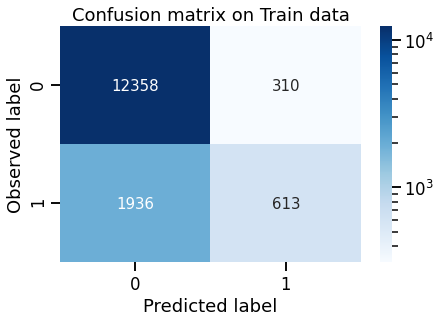

In [ ]:
# your code here
plot_confusion_matrix(best_estimate,X_train,y_train,test=False)

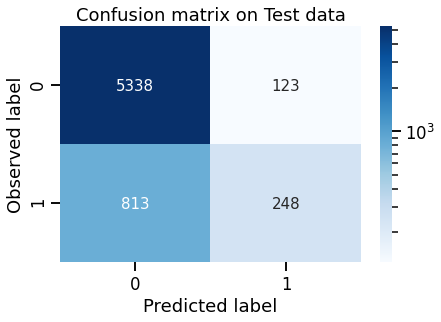

In [ ]:
plot_confusion_matrix(best_estimate,X_test,y_test,test=True)

**3.1 b) Calculate and print out the Observed Negatives(ON), Observed Positives(OP), Predicted Negatives(PN) & Predicted Positives(PP) for the test data-set**

In [ ]:
# your code here
confusion_mtx = confusion_matrix(y_test, best_estimate.predict(X_test))

In [ ]:
print(f'The Observed Negatives (ON) for the test set data is {confusion_mtx.sum(axis=1)[0]} and the Observed Positive (OP) for the test set data is {confusion_mtx.sum(axis=1)[1]}')
print(f'The Predicted Negatives (PN) for the test set data is {confusion_mtx.sum(axis=0)[0]} and the Predicted Positive (PP) for the test set data is {confusion_mtx.sum(axis=0)[1]}')

The Observed Negatives (ON) for the test set data is 5461 and the Observed Positive (OP) for the test set data is 1061
The Predicted Negatives (PN) for the test set data is 6151 and the Predicted Positive (PP) for the test set data is 371


In addition to these four quantities, the confusion matrix gives us more details on proper classifications and mis-classifications from our classifier:

- the samples that are +ive and the classifier predicts as +ive are called True Positives (TP). These are folks we correctly identified as responders,and thus sending them a mailing would result in a sale for us. True Positives are great. We do incur the cost of mailing them, but we like to because they will come into the store to buy.
- the samples that are -ive and the classifier predicts (wrongly) as +ive are called False Positives (FP). False Positives incur us the cost of mailing them as well, but are not very costly. These are people who wouldnt have responded, but we sent them a mailing because our classifier mispredicted them as buyers. Thus, for them, we only incur the cost of preparing the mailing and mailing it to them.
- the samples that are -ive and the classifier predicts as -ive are called True Negatives (TN). These are folks we correctly identified as not-responding, and thus we dont waste any money on sending them a mailing. This is a great classification for us.
- the samples that are +ive and the classifier predicts as -ive are called False Negatives (FN). False negatives are VERY costly: these are folks who would have responded to us had we mailed them, but we didnt target them, leading to huge lost sales per person. Notice that our Logistic classifier has tons of False Negatives

It is not enough to simply identify these categories from the confusion matrix. Rather, we want to sit down with our business team and identify the costs associated with each of the 4 classification situations above. Keep in mind that these costs might even change from year to year or even more suddenly: this is why it is important to have marketing and sales people on your data science teams. (See Patil, D. J. Building data science teams. " O'Reilly Media, Inc.", 2011.
 for more details).

#### 3.2 Cost  and Utility Matrix (6 points)

We use the costs to write a **risk or cost matrix** in the same form as the confusion matrix above. 

![cost matrix](https://github.com/Surojit-KB/Homework3/blob/master/images/costmatrix.png?raw=1)

The negative of the cost matrix is called the **utility matrix or profit matrix** `u`. We shall use this in the next part of the homework.

Lets assume the amortized cost of mailing it is \$3. Lets assume additionally that the profit margin on a sale is 30% (we are a high end clothing chain).
`True Negatives (TN)` cost us nothing but gain us nothing either. 

In [ ]:
# true negative cost
tnc = 0.0

From the average cost of a sale, and the 30% profit assumption, we calculate `tpc`, the cost of a `True Positive (TP)`. Note: `tpc` must be negative, since we are talking about costs.

The `tpc` takes into account the cost of mailing to the respondent & the cost of the coupon, and since our mailing works, we subtract out the profit. We use the average of the `AVRG` column(which is the average money spent by a customer on each visit) multiplied by the profit margin as the profit per person.

In [ ]:
# true positive cost
mail = 3 
profit_margin = 0.3
tpc = round(mail - df.AVRG.mean()*profit_margin,2)

The `False Negative (FN)` is a lost sale for us! We didnt mail them, and they didnt spend the money. They would have if we mailed them. So we lost a certain profit per such false negative! Thus the false-negative cost, given by `fnc`, is:

In [ ]:
fnc = round(np.mean(df.AVRG)*profit_margin,2)

This leaves us with `False Positives (FP)`. This is a person who would not have responded but you wasted $3 on. So the false positive cost, (`fpc`) is:

In [ ]:
fpc = mail

In [ ]:
print('TNC:', tnc,'\n','TPC:', tpc,'\n','FNC:', fnc,'\n','FPC:', fpc)

TNC: 0.0 
 TPC: -31.17 
 FNC: 34.17 
 FPC: 3


**Print out the profit matrix array. Use the costs described above**

In [ ]:
# your code here
#I TOOK THE NEGATIVE OF THE COST TO INDICATE THE PROFIT.
profit_mtx=-np.array([[tnc,fpc],
                     [fnc,tpc]])
print(profit_mtx)

[[ -0.    -3.  ]
 [-34.17  31.17]]


#### 3.3 Average Profit Per Person (16 points)

The Average Profit Per Person can be found by multiplying the utility matrix (u) by the confusion matrix elementwise, and dividing by the sum of the elements in the confusion matrix, or the test set size.

**3.3 a) Write a function to calculate the average profit per person by following the instructions below**

In [ ]:
def average_profit_pp(y, ypred, u):
    """
    Function
    --------
    average_profit_pp

    Inputs
    ------
    y: the observed response value (true value)
    ypred: the predicted response value
    u: Utility or the Profit matrix

    Returns
    -------
    score: average profit per person calculated
    """
    # your code here
    con_mat=confusion_matrix(y,ypred)
    print('The Confusion Matrix is')
    print(con_mat)
    profit_mat=np.multiply(con_mat,u)
    print('The Profit Matrix for the dataset is:')
    print(profit_mat)
    app=np.sum(profit_mat)/len(y)
    print(f'The Average Profit per Person is {app:.2f}')

**3.3 b) Calculate and Print the Avg Profit Per Person on our test data for the 2 baseline classifiers:** 
- Dont Send to Anyone Baseline Classifier (predicts that no customer will respond)
- Send to Everyone Baseline Classifier (predicts that all customers will respond)

In [ ]:
print('For the DONT SEND to ANYONE classifier:')
average_profit_pp(y_test,np.zeros(len(y_test)),profit_mtx)

For the DONT SEND to ANYONE classifier:
The Confusion Matrix is
[[5461    0]
 [1061    0]]
The Profit Matrix for the dataset is:
[[    -0.       -0.  ]
 [-36254.37      0.  ]]
The Average Profit per Person is -5.56


In [ ]:
print('For the SEND to EVERYONE classifier:')
average_profit_pp(y_test,np.ones(len(y_test)),profit_mtx)

For the SEND to EVERYONE classifier:
The Confusion Matrix is
[[   0 5461]
 [   0 1061]]
The Profit Matrix for the dataset is:
[[    -0.   -16383.  ]
 [    -0.    33071.37]]
The Average Profit per Person is 2.56


ANS<BR>
HERE WE CAN TRULY SEE THAT WE WOULD BE MAKING A LOSS IF WE JUST SELECT THE MODEL ON THE BASIS OF ACCURACY. THE SEND TO EVERYONE MODEL, WITH AN ACCURACY OF 16% MAKES A PROFIT OF $2.56$ WHILE THE DON'T SEND TO EVERYONE MODEL, WITH AN ACCURACY OF 83.39%, MAKES A LOSS OF $5.56$.

**3.3 c) Taking the average profit per person as the comparison metric, which one of the above 2 classifiers is the one to beat?**

ANS<BR>
THE SEND TO EVERONE CLASSIFER IS THE ONE TO BEAT IF WE ARE TO MAKE A PROFIT.



**3.3 d) What is the Avg Profit Per Person for our Logistic-L1 classifier?**

In [ ]:
print('For the LOGISTIC-L1 classifier:')
average_profit_pp(y_test,best_estimate.predict(X_test),profit_mtx)

For the LOGISTIC-L1 classifier:
The Confusion Matrix is
[[5338  123]
 [ 813  248]]
The Profit Matrix for the dataset is:
[[    -0.     -369.  ]
 [-27780.21   7730.16]]
The Average Profit per Person is -3.13


ANS<BR>
EVEN OUR LOGISTIC L1 MODEL IS ALSO MAKING A HEAVY LOSS OF $3.13$ DOLLARS PER PERSON. THIS SHOWS THAT WE CAN IMPROVE OUR MODEL

#### 3.4 Thresholds (6 points)

The `sklearn` API function `predict` assumes a threshold probability of having a +ve sample to be 0.5; that is, if a sample has a greater than 0.5 chance of being a 1, assume it is so. In the predictions above, we've done exactly that - if probability is >= 0.5, then `ypred` is 1 else 0.

By varying the threshold, the `ypred` and consequently the confusion matrix and the avg profit per person can change. 

**3.4 a) The thresholds are NOT always kept at 0.5 while solving a classification problem. Why do you think this happens? Can you think of any other real world example where we would want to change the threshold from 0.5?**

ANY HEAVILY IMBALANCED DATASET WILL REQUIRE US TO CHANGE THE THRESHOLD OF CLASSIFICATION OTHERWISE WE WILL GET EXTREMELY POOR RESULTS. EXAMPLE CAN BE A CREDIT CARD DETECTION PROBLEM, IN WHICH 99.9% OF THE DATASET WOULD BE A NON-FRAUD CLASS, IN WHICH CASE A THRESHOLD OF 0.5 WILL PERFORM VERY POORLY.



**3.4 b) Find out the average profit per person for a given thresholds of 0.05. You can use the helper function provided below to help with this problem**

In [ ]:
# helper function to return the predictions for a given threshold 't'

def t_repredict(clf,t,xtest):
    probs=clf.predict_proba(xtest)
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

In [ ]:
# your code here
#THIS WAS JUST A SIMPLE CODE TO CHECK WHICH THRESHOLD PROVIDES THE BEST PROFIT. KIND OF THE SAME THING THAT ROC CURVE IS DOING.
for i in np.arange(0.05,0.95,0.05):
  y_repred=t_repredict(best_estimate,i,X_test)
  print(f'The Probability Threshold is {i:.2f} and corresponding acc is {(y_repred==y_test).sum()/len(y_test):.4f}')
  average_profit_pp(y_test,y_repred,profit_mtx)
  print(" ")
  print(" ")

The Probability Threshold is 0.05 and corresponding acc is 0.5193
The Confusion Matrix is
[[2364 3097]
 [  38 1023]]
The Profit Matrix for the dataset is:
[[   -0.   -9291.  ]
 [-1298.46 31886.91]]
The Average Profit per Person is 3.27
 
 
The Probability Threshold is 0.10 and corresponding acc is 0.6179
The Confusion Matrix is
[[3042 2419]
 [  73  988]]
The Profit Matrix for the dataset is:
[[   -0.   -7257.  ]
 [-2494.41 30795.96]]
The Average Profit per Person is 3.23
 
 
The Probability Threshold is 0.15 and corresponding acc is 0.6861
The Confusion Matrix is
[[3554 1907]
 [ 140  921]]
The Profit Matrix for the dataset is:
[[   -0.   -5721.  ]
 [-4783.8  28707.57]]
The Average Profit per Person is 2.79
 
 
The Probability Threshold is 0.20 and corresponding acc is 0.7407
The Confusion Matrix is
[[3996 1465]
 [ 226  835]]
The Profit Matrix for the dataset is:
[[   -0.   -4395.  ]
 [-7722.42 26026.95]]
The Average Profit per Person is 2.13
 
 
The Probability Threshold is 0.25 and co

**3.4 c) Compare the above classifier with our baseline classifiers. What do you observe? Is this classifier worth pursuing?**

ANS<BR>
IN TERMS OF PROFIT, THE CLASSIFIER WITH 0.05 THRESHOLD IS DOING PRETTY WELL. IT DOES SEEM TO BE WORTH PURSUING.



## Part 4: ROC Curves & Profit Curves (20 points)

#### 4.1 ROC Curves (3 points)

ROC curves are a set of classifiers, many of them, each point corresponding to a different threshold. They are useful to compare classifiers to each other and also to baseline models.
(In the standard scenario, where we used the  classifier accuracy, this threshold is implicitly set at 0.5, and we have only one point on the ROC curve.).

The practical way to do this is to order the samples by probability of being positive. Then consider the sample with the highest score or highest probability of being positive. At first, only this sample is positive. Then, we take the sample with the next highest score, and call it positive. As we go down the list, we go down a threshold in score or probability. 

Now, for each such situation: only 1 positive, now 2 positive,....you can imagine a different classifier with a different confusion matrix. It will have its own false positives, three positives, etc. Its actually the same original classifier, but with a different threshold each time.

As we keep going down the list, decreasing the threshold, more and more samples become positive, and at first, the true positives rise faster than the false positives. Once past a certain point, false positives increase faster than true positives. Now, if you want a balanced classifier, you look at this turn-around point. But if you want a classifier which penalizes false positives and false negatives differently, the point you want is different.

To make a ROC curve you plot the True Positive Rate, 

$$TPR=\frac{TP}{OP}$$

against the False Positive Rate,

$$FPR=\frac{FP}{ON}$$

as you go through this process of going down the list of samples. ROC curves are useful because they calculate one classifier per threshold and show you where you are in TPR/FPR space without making any assumptions about the utility matrix or which threshold is appropriate.

A rote reading of the ROC curve (go to the "northwest" corner) is a bad idea: you must fold in the curve with any assumptions you are making about the utilities. In our case we have both an asymmetric data set, and asymmetric risk, so the north west corner may not be the right spot. Still, on the whole, a curve with a greater AUC (area under curve), or further away from the line of randomness, will give us a rough idea of what might be a better classifier.

**Plot the ROC curves for the Logistic-L1 model. Use the helper function below given below to help you out with this**

In [ ]:
# helper function to plot the ROC Curve

def make_roc(clf, ytest, xtest):
    
    fig,ax=plt.subplots(figsize=(12,8))
    fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve (area = %0.2f)' % (roc_auc))
    
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in range(0, fpr.shape[0],200):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
        
    ax.plot([0, 1], [0, 1], 'k--', label='No Model')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC')
    ax.legend(loc="lower right")
    
    return ax
        
    

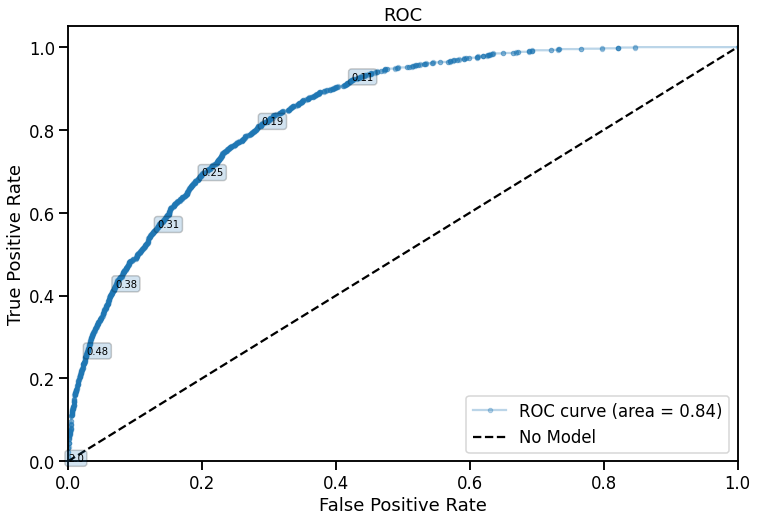

In [ ]:
#your code here
make_roc(best_estimate,y_test,X_test)

#### 4.2 Profit Curves (17 points)

Just like in a ROC curve, we go down the sorted (by score or probability) list of samples. We one-by-one add an additional sample to our positive samples, noting down the classifier's TPR and FPR and threshold. In addition to what we do for the ROC curve, we now also note down the percentage of our list of samples predicted as positive. Remember we start from the most positive, where the percentage labelled as positive would be minuscule, like 0.1 or so and the threshold like a 0.99 in probability or so. As we decrease the threshold, the percentage predicted to be positive clearly increases until everything is predicted positive at a threshold of 0. What we now do is, at each such additional sample/threshold (given to us by the `roc_curve` function from `sklearn`), we calculate the expected profit per person and plot it against the percentage predicted positive by that threshold to produce a profit curve. Thus, small percentages correspond to samples most likely to be positive: a percentage of 8% means the top 8% of our samples ranked by likelihood of being positive.


**4.2 a) Write a function to calculate the percentage of samples classified/predicted as positive given the TPR and FPR of a classifier. Follow the instructions below**

In [ ]:
def percentage(tpr, fpr, priorp, priorn):
    """
    Function
    --------
    percentage

    Inputs
    ------
    tpr: True Positive Rate
    fpr: False Positive Rate
    priorp: the probability of observed +ives (OP) on our test set
    priorn: the probability of observed -ives (ON) on our test set

    Returns
    -------
    perc: percentage of samples classified as positive
    """
    #your code here
    perc=tpr*priorp+fpr*priorn
    return perc
    

**4.2 b) Write a function to calculate the Expected Profit Per Person given the TPR & FPR from a classifier(this is different than our `average_profit_pp` above as we now want this in terms of TPR and FPR.**

In [ ]:
def av_profit(tpr, fpr, util, priorp, priorn):
    """
    Function
    --------
    percentage

    Inputs
    ------
    tpr: True Positive Rate
    fpr: False Positive Rate
    util: Utility Matrix
    priorp: the probability of observed +ives (OP) on our test set
    priorn: the probability of observed +ives (ON) on our test set

    Returns
    -------
    profit: the average profit per person at this (fpr, tpr) point in this ROC space.
    
    Notes
    -----
    see make_profit below for an example of how this is used
    """
    #your code here
    perc_mat=np.array([[(1-fpr)*priorn,fpr*priorn],
                            [(1-tpr)*priorp,tpr*priorp]])
    profit_mat=np.multiply(perc_mat,util)
    profit=np.sum(profit_mat)
    return profit

**4.2 c) Plot the Profit Curve for our Logistic-L1 model using the helper function below. Also plot the profit lines for the STE(Send to Everyone) and the DSTE (Dont Send to Anyone) baseline classifiers. Make sure the labels are appropriately named and the legend is clearly displayed**

In [ ]:
# helper function to plot the profit curve

def make_profit(clf, ytest, xtest, util):
    
    fig,ax=plt.subplots(figsize=(12,8))
    fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    priorp=np.mean(ytest)
    priorn=1. - priorp
    ben=[]
    percs=[]
    
    for i,t in enumerate(thresholds):
        perc=percentage(tpr[i], fpr[i], priorp, priorn)
        ev = av_profit(tpr[i], fpr[i], util, priorp, priorn)
        ben.append(ev)
        percs.append(perc*100)
    ax.plot(percs, ben, '-', alpha=0.3, markersize=5, label='Profit Curve for model' )
   
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
    boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in range(0, fpr.shape[0],200):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (percs[k], ben[k]), **label_kwargs)
                
    ax.set_xlabel('% Predicted Positive')
    ax.set_ylabel('Avg Profit Per Person')
    ax.set_title('Profit Curve')
    return ax


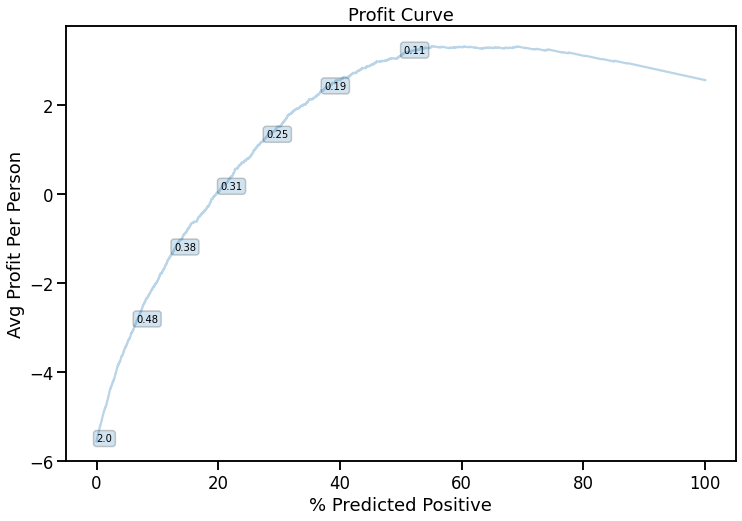

In [ ]:
# your code here
make_profit(best_estimate,y_test,X_test,profit_mtx)

**4.2 d) Why you only start making a profit at a certain percentage?**

ANS<BR>
THIS TIES UP WELL WITH WHAT WE SAW EARLIER IN THE ACCURACY VS PROFIT COMPARISON. IF WE DON'T PREDICT MANY POSITIVE RESULTS, WE WILL GET A GREAT ACCURACY BUT WE WON'T BE MAKING ANY SORT OF PROFIT. ON THE OTHER HAND, IF WE DECREASE THE THRESHOLD, WE ARE GOING TO PREDICT MORE AND MORE POSITIVE CASES AND GOING TO INCREASE THE PROFIT. WE NEED TO FIND THE SWEET THE SPOT WHERE WE HAVE THE MAXIMUM PROFIT.


**4.2 e) What is the region on interest on the graph that you might want to communicate with the company managers in terms of maximizing your profit over the baseline?**


ANS<BR>
THE REGION FROM 0.25 TO 0.11 IS THE BEST BET IF WE ARE TO MAXIMIZE THE PROFIT WHILE KEEPING IN MIND THAT WE DON'T INVEST TOO MUCH BY JUST SENDING THE MAIL TO ALL THE CUSTOMERS.



**THE END**<BR>
**THANKS FOR THE READ**